<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week1.do.txt --no_mako --no_abort -->
<!-- dom:TITLE: Week 3 January 15-19: Introduction to the course and start Variational Monte Carlo -->

# Week 3 January 15-19: Introduction to the course and start Variational Monte Carlo
**Morten Hjorth-Jensen  Email morten.hjorth-jensen@fys.uio.no**, Department of Physics and Center fo Computing in Science Education, University of Oslo, Oslo, Norway and Department of Physics and Astronomy and Facility for Rare Ion Beams, Michigan State University, East Lansing, Michigan, USA

Date: **Jan 19, 2024**

Copyright 1999-2024, Morten Hjorth-Jensen  Email morten.hjorth-jensen@fys.uio.no. Released under CC Attribution-NonCommercial 4.0 license

## Overview of first week, January 15-19
**Topics.**

* Introduction to the course and overview of topics to be covered

* Introduction to Variational Monte Carlo methods, Metropolis Algorithm, statistics and Markov Chain theory

* C++ and python programming

**Teaching Material, videos and written material.**

* Asynchronuous vidoes

* Lecture notes and reading assignments

* Additional (often recommended) background material

## Material this week
**Teaching Material, videos and written material (to be uploaded after lecture).**

* [Video of lecture with subtitles](https://youtu.be/2N0KS7uJJvo)

* [Slides for first week](http://compphysics.github.io/ComputationalPhysics2/doc/pub/week1/html/week1-reveal.html)

## Teaching team

1. Daniel Haas Lima Beccatini, d.h.b.lima@fys.uio.no, office FØ454

2. Håkon Kvernmoen, hakon.kvernmoen@fys.uio.no, office FØ456

3. Morten Hjorth-Jensen, mhjensen@uio.no, office FØ470

4. Ruben Guevara, ruben.guevara@fys.uio.no, office FØ375

## Textbooks

There are no unique textbooks which cover the material to be
discussed. For each week however, we will, in addition to our own
lecture notes, send links to additional literature.

## Lectures and ComputerLab

  * Lectures: Friday (10.15am-12pm). First time January 19. Last lecture session May 10 (can be changed).

  * Computerlab: Friday (12.15pm-3pm), first time January 19, last lab session May 10 (can be changed).

  * Weekly plans and all other information are on the webpage of the course

  * **First project to be handed in March 22**.

  * **Second and final project to be handed in June 1.**

  * There is no final exam, only project work.

## Course Format

  * Two  compulsory projects. Electronic reports only. You are free to choose your format. We use canvas.uio.no to hand in the projects.

  * Evaluation and grading: The two  projects count 1/2 each of the final mark. 

  * The computer lab (room FØ434 in the Physics building) has no PCs, so please bring your own laptops. C/C++ and Python are the default programming language, but programming languages like Fortran2008, Rust, Julia and other can  also be used. All source codes discussed during the lectures can be found at the webpage of the course.

## Aims
* Be able to apply central many-particle methods like the Variational Monte Carlo method to properties of many-fermion systems and many-boson systems.

* Understand how to simulate quantum mechanical systems with many interacting particles. The methods are relevant for atomic, molecular, condensed matter physics, materials science, nanotechnology, quantum chemistry  and nuclear physics. 

* Learn to manage and structure larger projects, with unit tests, object orientation and writing clean code

* Learn about a proper statistical analysis of large data sets

## More aims
* Learn to optimize with convex optimization methods functions that depend on many variables.

* Parallelization and code optimizations

* Depending on interests, the second project can focus on different topics. These can be **quantum computing for studies of quantum mechanical problems**, machine learning for solving quantum-mechanical problems, quantum machine learning and many-body methods like coupled cluster theory, Hartree-Fock theory and other.

## Topics covered in this course

  * Parallelization (MPI and OpenMP), high-performance computing topics. Choose between Python, Fortran2008 and/or C++ as programming languages. 

  * Algorithms for Monte Carlo Simulations (multidimensional integrals), Metropolis-Hastings and importance sampling algorithms.  Improved Monte Carlo methods.

  * Statistical analysis of data  from Monte Carlo calculations, bootstrapping, jackknife and blocking methods. 

  * Eigenvalue solvers

## More on topics covered in this course
  * For project 2 there are several possibilities

a. Variational Monte Carlo for fermions

b. Hartree-Fock theory for fermions

c. Coupled cluster theory for fermions (iterative methods)

d. Neural networks and Machine Learning to solve the same problems as in project 1

e. Eigenvalue problems with deep learning methods

f. Possible project on quantum computing and quantum machine learning

## Other topics covered in this course
  * Search for minima in multidimensional spaces (conjugate gradient method, steepest descent method, quasi-Newton-Raphson, Broyden-Jacobian). Convex optimization, gradient methods

  * Iterative methods for solutions of non-linear equations.

  * Object orientation

  * Data analysis and resampling techniques

  * Variational Monte Carlo (VMC) for **ab initio** studies of quantum mechanical many-body systems.

  * Simulation of two- and three-dimensional systems like quantum dots or atoms and molecules or systems from solid state physics

## Last (?) word on  topics covered in this course
  * **Simulation of trapped bosons using VMC (project 1, default)**

  * **Machine learning and neural networks (project 2, default, same system as in project 1)**

  * Extension of project 1 to fermionic systems (project 2)

  * Coupled cluster theory (project 2, depends on interest)

  * Other quantum-mechanical methods and systems can be tailored to one's interests (Hartree-Fock Theory, Many-body perturbation theory, time-dependent theories and more).

## Quantum Monte Carlo Motivation

Most quantum mechanical  problems of interest in for example atomic, molecular, nuclear and solid state 
physics consist of a large number of interacting electrons and ions or nucleons. 

The total number of particles $N$ is usually sufficiently large
that an exact solution cannot be found. 

Typically, 
the expectation value for a chosen hamiltonian for a system of  $N$ particles is

$$
\langle H \rangle =
   \frac{\int d\boldsymbol{R}_1d\boldsymbol{R}_2\dots d\boldsymbol{R}_N
         \Psi^{\ast}(\boldsymbol{R_1},\boldsymbol{R}_2,\dots,\boldsymbol{R}_N)
          H(\boldsymbol{R_1},\boldsymbol{R}_2,\dots,\boldsymbol{R}_N)
          \Psi(\boldsymbol{R_1},\boldsymbol{R}_2,\dots,\boldsymbol{R}_N)}
        {\int d\boldsymbol{R}_1d\boldsymbol{R}_2\dots d\boldsymbol{R}_N
        \Psi^{\ast}(\boldsymbol{R_1},\boldsymbol{R}_2,\dots,\boldsymbol{R}_N)
        \Psi(\boldsymbol{R_1},\boldsymbol{R}_2,\dots,\boldsymbol{R}_N)},
$$

an in general intractable problem.

 This integral is actually the starting point in a Variational Monte Carlo calculation. **Gaussian quadrature: Forget it**! Given 10 particles and 10 mesh points for each degree of freedom
and an
 ideal 1 Tflops machine (all operations take the same time), how long will it take to compute the above integral? The lifetime of the universe is of the order of $10^{17}$ s.

## Quantum Monte Carlo Motivation

As an example from the nuclear many-body problem, we have Schroedinger's equation as a differential equation

$$
\hat{H}\Psi(\boldsymbol{r}_1,..,\boldsymbol{r}_A,\alpha_1,..,\alpha_A)=E\Psi(\boldsymbol{r}_1,..,\boldsymbol{r}_A,\alpha_1,..,\alpha_A)
$$

where

$$
\boldsymbol{r}_1,..,\boldsymbol{r}_A,
$$

are the coordinates and

$$
\alpha_1,..,\alpha_A,
$$

are sets of relevant quantum numbers such as spin and isospin for a system of  $A$ nucleons ($A=N+Z$, $N$ being the number of neutrons and $Z$ the number of protons).

## Quantum Monte Carlo Motivation

There are

$$
2^A\times \left(\begin{array}{c} A\\ Z\end{array}\right)
$$

coupled second-order differential equations in $3A$ dimensions.

For a nucleus like beryllium-10 this number is **215040**.
This is a truely challenging many-body problem.

Methods like partial differential equations can at most be used for 2-3 particles.

## Various many-body methods

* Monte-Carlo methods

* Renormalization group (RG) methods, in particular density matrix RG

* Large-scale diagonalization (Iterative methods, Lanczo's method, dimensionalities  $10^{10}$ states)

* Coupled cluster theory, favoured method in quantum chemistry, molecular and atomic physics. Applications to ab initio calculations in nuclear physics as well for large nuclei.

* Perturbative many-body methods 

* Green's function methods

* Density functional theory/Mean-field theory and Hartree-Fock theory

The physics of the system hints at which many-body methods to use.

## Pros and Cons of Monte Carlo
* Is physically intuitive.

* Allows one to study systems with many degrees of freedom. Diffusion Monte Carlo (DMC) and Green's function Monte Carlo (GFMC) yield in principle the exact solution to Schroedinger's equation.

* Variational Monte Carlo (VMC) is easy  to implement but needs a reliable trial wave function, can be difficult to obtain.  This is where we will use Hartree-Fock theory to construct an optimal basis.

* DMC/GFMC for fermions (spin with half-integer values, electrons, baryons, neutrinos, quarks)  has a sign problem. Nature prefers an anti-symmetric wave function. The PDF in this case given distribution of random walkers.

## More on Pros and Cons of Monte Carlo

* The solution has a statistical error, which can be large. 

* There is a limit for how large systems one can study, DMC needs a huge number of random walkers in order to achieve stable results. 

* Obtain only the lowest-lying states with a given symmetry. Can get excited states with extra labor.

## Where and why do we use Monte Carlo Methods in Quantum Physics
* Quantum systems with many particles at finite temperature: Path Integral Monte Carlo with applications to dense matter and quantum liquids (phase transitions from normal fluid to superfluid). Strong correlations.

* Bose-Einstein condensation of dilute gases, method transition from  non-linear PDE to Diffusion Monte Carlo as density increases.

* Light atoms, molecules, solids and nuclei. 

* Lattice Quantum-Chromo Dynamics. Impossible to solve without MC calculations. 

* Simulations of systems in solid state physics, from semiconductors to spin systems. Many electrons active and possibly strong correlations.

## Quantum Monte Carlo Motivation

We start with the variational principle.
Given a hamiltonian $H$ and a trial wave function $\Psi_T$, the variational principle states that the expectation value of $\langle H \rangle$, defined through

$$
E[H]= \langle H \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})H(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})},
$$

is an upper bound to the ground state energy $E_0$ of the hamiltonian $H$, that is

$$
E_0 \le \langle H \rangle .
$$

In general, the integrals involved in the calculation of various  expectation values  are multi-dimensional ones. Traditional integration methods such as the Gauss-Legendre will not be adequate for say the  computation of the energy of a many-body system.

## Quantum Monte Carlo Motivation

The trial wave function can be expanded in the eigenstates of the hamiltonian since they form a complete set, viz.,

$$
\Psi_T(\boldsymbol{R})=\sum_i a_i\Psi_i(\boldsymbol{R}),
$$

and assuming the set of eigenfunctions to be normalized one obtains

$$
\frac{\sum_{nm}a^*_ma_n \int d\boldsymbol{R}\Psi^{\ast}_m(\boldsymbol{R})H(\boldsymbol{R})\Psi_n(\boldsymbol{R})}
        {\sum_{nm}a^*_ma_n \int d\boldsymbol{R}\Psi^{\ast}_m(\boldsymbol{R})\Psi_n(\boldsymbol{R})} =\frac{\sum_{n}a^2_n E_n}
        {\sum_{n}a^2_n} \ge E_0,
$$

where we used that $H(\boldsymbol{R})\Psi_n(\boldsymbol{R})=E_n\Psi_n(\boldsymbol{R})$.
In general, the integrals involved in the calculation of various  expectation
values  are multi-dimensional ones. 
The variational principle yields the lowest state of a given symmetry.

## Quantum Monte Carlo Motivation

In most cases, a wave function has only small values in large parts of 
configuration space, and a straightforward procedure which uses
homogenously distributed random points in configuration space 
will most likely lead to poor results. This may suggest that some kind
of importance sampling combined with e.g., the Metropolis algorithm 
may be  a more efficient way of obtaining the ground state energy.
The hope is then that those regions of configurations space where
the wave function assumes appreciable values are sampled more 
efficiently.

## Quantum Monte Carlo Motivation

The tedious part in a VMC calculation is the search for the variational
minimum. A good knowledge of the system is required in order to carry out
reasonable VMC calculations. This is not always the case, 
and often VMC calculations 
serve rather as the starting
point for so-called diffusion Monte Carlo calculations (DMC). DMC is a way of
solving exactly the many-body Schroedinger equation by means of 
a stochastic procedure. A good guess on the binding energy
and its wave function is however necessary. 
A carefully performed VMC calculation can aid in this context.

## Quantum Monte Carlo, ingredients and basic steps

* Construct first a trial wave function $\psi_T(\boldsymbol{R},\boldsymbol{\alpha})$,  for a many-body system consisting of $N$ particles located at positions  $\boldsymbol{R}=(\boldsymbol{R}_1,\dots ,\boldsymbol{R}_N)$. The trial wave function depends on $\alpha$ variational parameters $\boldsymbol{\alpha}=(\alpha_1,\dots ,\alpha_M)$.

* Then we evaluate the expectation value of the hamiltonian $H$

$$
E[H]=\langle H \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_{T}(\boldsymbol{R},\boldsymbol{\alpha})H(\boldsymbol{R})\Psi_{T}(\boldsymbol{R},\boldsymbol{\alpha})}
        {\int d\boldsymbol{R}\Psi^{\ast}_{T}(\boldsymbol{R},\boldsymbol{\alpha})\Psi_{T}(\boldsymbol{R},\boldsymbol{\alpha})}.
$$

* Thereafter we vary $\alpha$ according to some minimization algorithm and return to the first step.

## Quantum Monte Carlo, basic steps, the probability distribution function (PDF)

Choose a trial wave function
$\psi_T(\boldsymbol{R})$.

$$
P(\boldsymbol{R})= \frac{\left|\psi_T(\boldsymbol{R})\right|^2}{\int \left|\psi_T(\boldsymbol{R})\right|^2d\boldsymbol{R}}.
$$

This is our new probability distribution function  (PDF).
The approximation to the expectation value of the Hamiltonian is now

$$
E[H(\boldsymbol{\alpha})] = 
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R},\boldsymbol{\alpha})H(\boldsymbol{R})\Psi_T(\boldsymbol{R},\boldsymbol{\alpha})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R},\boldsymbol{\alpha})\Psi_T(\boldsymbol{R},\boldsymbol{\alpha})}.
$$

## Quantum Monte Carlo ingredients, the local energy

Define a new quantity

<!-- Equation labels as ordinary links -->
<div id="eq:locale1"></div>

$$
E_L(\boldsymbol{R},\boldsymbol{\alpha})=\frac{1}{\psi_T(\boldsymbol{R},\boldsymbol{\alpha})}H\psi_T(\boldsymbol{R},\boldsymbol{\alpha}),
\label{eq:locale1} \tag{1}
$$

called the local energy, which, together with our trial PDF yields

<!-- Equation labels as ordinary links -->
<div id="eq:vmc1"></div>

$$
E[H(\boldsymbol{\alpha})]=\int P(\boldsymbol{R})E_L(\boldsymbol{R}) d\boldsymbol{R}\approx \frac{1}{N}\sum_{i=1}^N E_L(\boldsymbol{R_i},\boldsymbol{\alpha})
\label{eq:vmc1} \tag{2}
$$

with $N$ being the number of Monte Carlo samples.

## Quantum Monte Carlo algorithm
The Algorithm for performing a variational Monte Carlo calculations runs thus as this

   * Initialisation: Fix the number of Monte Carlo steps. Choose an initial $\boldsymbol{R}$ and variational parameters $\alpha$ and calculate $\left|\psi_T^{\alpha}(\boldsymbol{R})\right|^2$. 

   * Initialise the energy and the variance and start the Monte Carlo calculation.

      * Calculate  a trial position  $\boldsymbol{R}_p=\boldsymbol{R}+r*step$ where $r$ is a random variable $r \in [0,1]$.

      * Metropolis algorithm to accept or reject this move  $w = P(\boldsymbol{R}_p)/P(\boldsymbol{R})$.

      * If the step is accepted, then we set $\boldsymbol{R}=\boldsymbol{R}_p$. 

      * Update averages

   * Finish and compute final averages.

Observe that the jumping in space is governed by the variable *step*. This is Called brute-force sampling.
Need importance sampling to get more relevant sampling, see lectures below.

## Quantum Monte Carlo: hydrogen atom

The radial Schroedinger equation for the hydrogen atom can be
written as

$$
-\frac{\hbar^2}{2m}\frac{\partial^2 u(r)}{\partial r^2}-
\left(\frac{ke^2}{r}-\frac{\hbar^2l(l+1)}{2mr^2}\right)u(r)=Eu(r),
$$

or with dimensionless variables

<!-- Equation labels as ordinary links -->
<div id="eq:hydrodimless1"></div>

$$
-\frac{1}{2}\frac{\partial^2 u(\rho)}{\partial \rho^2}-
\frac{u(\rho)}{\rho}+\frac{l(l+1)}{2\rho^2}u(\rho)-\lambda u(\rho)=0,
\label{eq:hydrodimless1} \tag{3}
$$

with the hamiltonian

$$
H=-\frac{1}{2}\frac{\partial^2 }{\partial \rho^2}-
\frac{1}{\rho}+\frac{l(l+1)}{2\rho^2}.
$$

## Introducing the variational parameters

We introduce the variational parameter $\alpha$ in the trial
wave function

$$
u_T^{\alpha}(\rho)=\alpha\rho e^{-\alpha\rho}.
$$

## Quantum Monte Carlo: results for the hydrogen atom

Inserting this wave function into the expression for the
local energy $E_L$ gives

$$
E_L(\rho)=-\frac{1}{\rho}-
              \frac{\alpha}{2}\left(\alpha-\frac{2}{\rho}\right).
$$

A simple variational Monte Carlo calculation results in
<table class="dotable" border="1">
<thead>
<tr><th align="center">  $\alpha$ </th> <th align="center">$\langle H \rangle $</th> <th align="center"> $\sigma^2$</th> <th align="center">$\sigma/\sqrt{N}$</th> </tr>
</thead>
<tbody>
<tr><td align="center">   7.00000E-01    </td> <td align="center">   -4.57759E-01            </td> <td align="center">   4.51201E-02    </td> <td align="center">   6.71715E-04          </td> </tr>
<tr><td align="center">   8.00000E-01    </td> <td align="center">   -4.81461E-01            </td> <td align="center">   3.05736E-02    </td> <td align="center">   5.52934E-04          </td> </tr>
<tr><td align="center">   9.00000E-01    </td> <td align="center">   -4.95899E-01            </td> <td align="center">   8.20497E-03    </td> <td align="center">   2.86443E-04          </td> </tr>
<tr><td align="center">   1.00000E-00    </td> <td align="center">   -5.00000E-01            </td> <td align="center">   0.00000E+00    </td> <td align="center">   0.00000E+00          </td> </tr>
<tr><td align="center">   1.10000E+00    </td> <td align="center">   -4.93738E-01            </td> <td align="center">   1.16989E-02    </td> <td align="center">   3.42036E-04          </td> </tr>
<tr><td align="center">   1.20000E+00    </td> <td align="center">   -4.75563E-01            </td> <td align="center">   8.85899E-02    </td> <td align="center">   9.41222E-04          </td> </tr>
<tr><td align="center">   1.30000E+00    </td> <td align="center">   -4.54341E-01            </td> <td align="center">   1.45171E-01    </td> <td align="center">   1.20487E-03          </td> </tr>
</tbody>
</table>

## Quantum Monte Carlo: interpreting the hydrogen atom results

We note that at $\alpha=1$ we obtain the exact
result, and the variance is zero, as it should. The reason is that 
we then have the exact wave function, and the action of the hamiltionan
on the wave function

$$
H\psi = \mathrm{constant}\times \psi,
$$

yields just a constant. The integral which defines various 
expectation values involving moments of the hamiltonian becomes then

$$
\langle H^n \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})H^n(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}=
\mathrm{constant}\times\frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}=\mathrm{constant}.
$$

**This gives an important information: the exact wave function leads to zero variance!**
Variation is then performed by minimizing both the energy and the variance.

## [Quantum Monte Carlo for bosons](https://github.com/mortele/variational-monte-carlo-fys4411)

For bosons in a harmonic oscillator-like  trap we will use is a spherical (S)
 or an elliptical (E) harmonic trap in one, two and finally three
 dimensions, with the latter given by

<!-- Equation labels as ordinary links -->
<div id="trap_eqn"></div>

$$
\begin{equation}
 V_{ext}(\mathbf{r}) = \Bigg\{
 \begin{array}{ll}
	 \frac{1}{2}m\omega_{ho}^2r^2 & (S)\\
 \strut
	 \frac{1}{2}m[\omega_{ho}^2(x^2+y^2) + \omega_z^2z^2] & (E)
\label{trap_eqn} \tag{4}
 \end{array}
 \end{equation}
$$

where (S) stands for symmetric and

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
     \hat{H} = \sum_i^N \left(
	 \frac{-\hbar^2}{2m}
	 { \bigtriangledown }_{i}^2 +
	 V_{ext}({\bf{r}}_i)\right)  +
	 \sum_{i<j}^{N} V_{int}({\bf{r}}_i,{\bf{r}}_j),
\label{_auto1} \tag{5}
\end{equation}
$$

as the two-body Hamiltonian of the system.

## [Quantum Monte Carlo for bosons](https://github.com/mortele/variational-monte-carlo-fys4411)

 We will represent the inter-boson interaction by a pairwise, repulsive potential

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
 V_{int}(|\mathbf{r}_i-\mathbf{r}_j|) =  \Bigg\{
 \begin{array}{ll}
	 \infty & {|\mathbf{r}_i-\mathbf{r}_j|} \leq {a}\\
	 0 & {|\mathbf{r}_i-\mathbf{r}_j|} > {a}
 \end{array}
\label{_auto2} \tag{6}
\end{equation}
$$

where $a$ is the so-called hard-core diameter of the bosons.
 Clearly, $V_{int}(|\mathbf{r}_i-\mathbf{r}_j|)$ is zero if the bosons are
 separated by a distance $|\mathbf{r}_i-\mathbf{r}_j|$ greater than $a$ but
 infinite if they attempt to come within a distance $|\mathbf{r}_i-\mathbf{r}_j| \leq a$.

## [Quantum Monte Carlo for bosons](https://github.com/mortele/variational-monte-carlo-fys4411)

 Our trial wave function for the ground state with $N$ atoms is given by

<!-- Equation labels as ordinary links -->
<div id="eq:trialwf"></div>

$$
\begin{equation}
 \Psi_T(\mathbf{R})=\Psi_T(\mathbf{r}_1, \mathbf{r}_2, \dots \mathbf{r}_N,\alpha,\beta)=\prod_i g(\alpha,\beta,\mathbf{r}_i)\prod_{i<j}f(a,|\mathbf{r}_i-\mathbf{r}_j|),
\label{eq:trialwf} \tag{7}
 \end{equation}
$$

where $\alpha$ and $\beta$ are variational parameters. The
 single-particle wave function is proportional to the harmonic
 oscillator function for the ground state

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
    g(\alpha,\beta,\mathbf{r}_i)= \exp{[-\alpha(x_i^2+y_i^2+\beta z_i^2)]}.
\label{_auto3} \tag{8}
\end{equation}
$$

## [Quantum Monte Carlo for bosons](https://github.com/mortele/variational-monte-carlo-fys4411)

The rest of this material is best read using the jupyter-notebook

For spherical traps we have $\beta = 1$ and for non-interacting
bosons ($a=0$) we have $\alpha = 1/2a_{ho}^2$.  The correlation wave
 function is

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
    f(a,|\mathbf{r}_i-\mathbf{r}_j|)=\Bigg\{
 \begin{array}{ll}
	 0 & {|\mathbf{r}_i-\mathbf{r}_j|} \leq {a}\\
	 (1-\frac{a}{|\mathbf{r}_i-\mathbf{r}_j|}) & {|\mathbf{r}_i-\mathbf{r}_j|} > {a}.
 \end{array}
\label{_auto4} \tag{9}
\end{equation}
$$

### Simple example, the hydrogen atom

The radial Schroedinger equation for the hydrogen atom can be
written as (when we have gotten rid of the first derivative term in the kinetic energy and used $rR(r)=u(r)$)

$$
-\frac{\hbar^2}{2m}\frac{d^2 u(r)}{d r^2}-
\left(\frac{ke^2}{r}-\frac{\hbar^2l(l+1)}{2mr^2}\right)u(r)=Eu(r).
$$

We will specialize to the case with $l=0$ and end up with

$$
-\frac{\hbar^2}{2m}\frac{d^2 u(r)}{d r^2}-
\left(\frac{ke^2}{r}\right)u(r)=Eu(r).
$$

Then we introduce a dimensionless variable $\rho=r/a$ where $a$ is a constant with dimension length.
Multiplying with $ma^2/\hbar^2$ we can rewrite our equations as

$$
-\frac{1}{2}\frac{d^2 u(\rho)}{d \rho^2}-
\frac{ke^2ma}{\hbar^2}\frac{u(\rho)}{\rho}-\lambda u(\rho)=0.
$$

Since $a$ is just a parameter we choose to set

$$
\frac{ke^2ma}{\hbar^2}=1,
$$

which leads to $a=\hbar^2/mke^2$, better known as the Bohr radius with value $0.053$ nm. Scaling the equations this way does not only render our numerical treatment simpler since we avoid carrying with us all physical parameters, but we obtain also a **natural** length scale. We will see this again and again. In our discussions below with a harmonic oscillator trap, the **natural** lentgh scale with be determined by the oscillator frequency, the mass of the particle and $\hbar$. We have also defined a dimensionless 'energy' $\lambda = Ema^2/\hbar^2$. 
With the rescaled quantities, the ground state energy of the hydrogen atom is $1/2$. 
The equation we want to solve is now defined by the Hamiltonian

$$
H=-\frac{1}{2}\frac{d^2 }{d \rho^2}-\frac{1}{\rho}.
$$

As trial wave function we peep now into the analytical solution for
the hydrogen atom and use (with $\alpha$ as a variational parameter)

$$
u_T^{\alpha}(\rho)=\alpha\rho \exp{-(\alpha\rho)}.
$$

Inserting this wave function into the expression for the
local energy $E_L$ gives

$$
E_L(\rho)=-\frac{1}{\rho}-
              \frac{\alpha}{2}\left(\alpha-\frac{2}{\rho}\right).
$$

To have analytical local energies saves us from computing numerically
the second derivative, a feature which often increases our numerical
expenditure with a factor of three or more. Integratng up the local energy (recall to bring back the PDF in the integration) gives  $\overline{E}[\boldsymbol{\alpha}]=\alpha(\alpha/2-1)$.

### Second example, the harmonic oscillator in one dimension

We present here another well-known example, the harmonic oscillator in
one dimension for one particle. This will also serve the aim of
introducing our next model, namely that of interacting electrons in a
harmonic oscillator trap.

Here as well, we do have analytical solutions and the energy of the
ground state, with $\hbar=1$, is $1/2\omega$, with $\omega$ being the
oscillator frequency. We use the following trial wave function

$$
\psi_T(x;\alpha) = \exp{-(\frac{1}{2}\alpha^2x^2)},
$$

which results in a local energy

$$
\frac{1}{2}\left(\alpha^2+x^2(1-\alpha^4)\right).
$$

We can compare our numerically calculated energies with the exact energy as function of $\alpha$

$$
\overline{E}[\alpha] = \frac{1}{4}\left(\alpha^2+\frac{1}{\alpha^2}\right).
$$

Similarly, with the above ansatz, we can also compute the exact variance which reads

$$
\sigma^2[\alpha]=\frac{1}{4}\left(1+(1-\alpha^4)^2\frac{3}{4\alpha^4}\right)-\overline{E}^2.
$$

Our code for computing the energy of the ground state of the harmonic oscillator follows here. We start by defining directories where we store various outputs.

In [5]:
# Common imports
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "Results/VMCHarmonic"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

outfile = open(data_path("VMCHarmonic.dat"),'w')

We proceed with the implementation of the Monte Carlo algorithm but list first the ansatz for the wave function and the expression for the local energy

In [6]:
%matplotlib inline

# VMC for the one-dimensional harmonic oscillator
# Brute force Metropolis, no importance sampling and no energy minimization
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
# Trial wave function for the Harmonic oscillator in one dimension
def WaveFunction(r,alpha):
    return exp(-0.5*alpha*alpha*r*r)

# Local energy  for the Harmonic oscillator in one dimension
def LocalEnergy(r,alpha):
    return 0.5*r*r*(1-alpha**4) + 0.5*alpha*alpha

Note that in the Metropolis algorithm there is no need to compute the
trial wave function, mainly since we are just taking the ratio of two
exponentials. It is then from a computational point view, more
convenient to compute the argument from the ratio and then calculate
the exponential. Here we have refrained from this purely of
pedagogical reasons.

In [7]:
# The Monte Carlo sampling with the Metropolis algo
# The jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when the function is called.
def MonteCarloSampling():

    NumberMCcycles= 1000000
    StepSize = 1.0
    # positions
    PositionOld = 0.0
    PositionNew = 0.0

    # seed for rng generator
    seed()
    # start variational parameter
    alpha = 0.4
    for ia in range(MaxVariations):
        alpha += .05
        AlphaValues[ia] = alpha
        energy = energy2 = 0.0
        #Initial position
        PositionOld = StepSize * (random() - .5)
        wfold = WaveFunction(PositionOld,alpha)
        #Loop over MC MCcycles
        for MCcycle in range(NumberMCcycles):
            #Trial position 
            PositionNew = PositionOld + StepSize*(random() - .5)
            wfnew = WaveFunction(PositionNew,alpha)
            #Metropolis test to see whether we accept the move
            if random() <= wfnew**2 / wfold**2:
                PositionOld = PositionNew
                wfold = wfnew
            DeltaE = LocalEnergy(PositionOld,alpha)
            energy += DeltaE
            energy2 += DeltaE**2
        #We calculate mean, variance and error
        energy /= NumberMCcycles
        energy2 /= NumberMCcycles
        variance = energy2 - energy**2
        error = sqrt(variance/NumberMCcycles)
        Energies[ia] = energy    
        Variances[ia] = variance    
        outfile.write('%f %f %f %f \n' %(alpha,energy,variance,error))
    return Energies, AlphaValues, Variances

Finally, the results are presented here with the exact energies and variances as well.

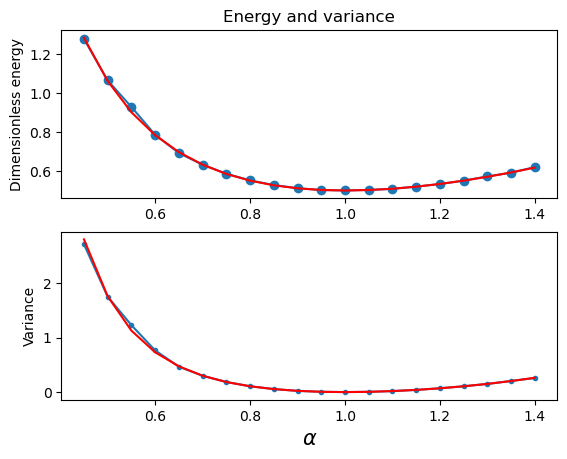

    Alpha    Energy  Exact Energy  Variance  Exact Variance
0    0.45  1.279120      1.285193  2.712441        2.803442
1    0.50  1.065828      1.062500  1.750848        1.757812
2    0.55  0.929475      0.902071  1.228665        1.127465
3    0.60  0.786278      0.784444  0.765278        0.730706
4    0.65  0.692471      0.697341  0.466899        0.472569
5    0.70  0.632571      0.632704  0.299251        0.300629
6    0.75  0.586430      0.585069  0.185144        0.184613
7    0.80  0.551909      0.550625  0.107554        0.106376
8    0.85  0.528043      0.526646  0.055709        0.054712
9    0.90  0.511824      0.511142  0.022673        0.022532
10   0.95  0.502433      0.502633  0.005218        0.005280
11   1.00  0.500000      0.500000  0.000000        0.000000
12   1.05  0.502916      0.502382  0.004664        0.004776
13   1.10  0.508195      0.509112  0.018632        0.018389
14   1.15  0.519881      0.519661  0.040144        0.040095
15   1.20  0.533037      0.533611  0.070

In [8]:
#Here starts the main program with variable declarations
MaxVariations = 20
Energies = np.zeros((MaxVariations))
ExactEnergies = np.zeros((MaxVariations))
ExactVariance = np.zeros((MaxVariations))
Variances = np.zeros((MaxVariations))
AlphaValues = np.zeros(MaxVariations)
(Energies, AlphaValues, Variances) = MonteCarloSampling()
outfile.close()
ExactEnergies = 0.25*(AlphaValues*AlphaValues+1.0/(AlphaValues*AlphaValues))
ExactVariance = 0.25*(1.0+((1.0-AlphaValues**4)**2)*3.0/(4*(AlphaValues**4)))-ExactEnergies*ExactEnergies

#simple subplot
plt.subplot(2, 1, 1)
plt.plot(AlphaValues, Energies, 'o-',AlphaValues, ExactEnergies,'r-')
plt.title('Energy and variance')
plt.ylabel('Dimensionless energy')
plt.subplot(2, 1, 2)
plt.plot(AlphaValues, Variances, '.-',AlphaValues, ExactVariance,'r-')
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel('Variance')
save_fig("VMCHarmonic")
plt.show()
#nice printout with Pandas
import pandas as pd
from pandas import DataFrame
data ={'Alpha':AlphaValues, 'Energy':Energies,'Exact Energy':ExactEnergies,'Variance':Variances,'Exact Variance':ExactVariance,}
frame = pd.DataFrame(data)
print(frame)

For $\alpha=1$ we have the exact eigenpairs, as can be deduced from the
table here. With $\omega=1$, the exact energy is $1/2$ a.u. with zero
variance, as it should. We see also that our computed variance follows rather well the exact variance.
Increasing the number of Monte Carlo cycles will improve our statistics (try to increase the number of Monte Carlo cycles).

The fact that the variance is exactly equal to zero when $\alpha=1$ is that 
we then have the exact wave function, and the action of the hamiltionan
on the wave function

$$
H\psi = \mathrm{constant}\times \psi,
$$

yields just a constant. The integral which defines various 
expectation values involving moments of the hamiltonian becomes then

$$
\langle H^n \rangle =
   \frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})H^n(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}=
\mathrm{constant}\times\frac{\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}
        {\int d\boldsymbol{R}\Psi^{\ast}_T(\boldsymbol{R})\Psi_T(\boldsymbol{R})}=\mathrm{constant}.
$$

**This gives an important information: the exact wave function leads to zero variance!**
As we will see later, many practitioners perform a minimization on both the energy and the variance.